In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus']=False

In [2]:
# 데이터 읽기.
# thousands=',' : 천 단위 자리수 구분 콤마 없애고 불러옴.
df = pd.read_csv('data/crime_in_Seoul.csv', encoding='CP949', index_col='관서명', thousands=',')
df

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
관서명,,,,,,,,,,
중부서,2,2,3,2,105,65,1395,477,1355,1170
종로서,3,3,6,5,115,98,1070,413,1278,1070
남대문서,1,0,6,4,65,46,1153,382,869,794
서대문서,2,2,5,4,154,124,1812,738,2056,1711
혜화서,3,2,5,4,96,63,1114,424,1015,861
용산서,5,5,14,14,194,173,1557,587,2050,1704
성북서,2,2,2,1,86,71,953,409,1194,1015
동대문서,5,5,13,13,173,146,1981,814,2548,2227
마포서,8,8,14,10,294,247,2555,813,2983,2519


In [3]:
# 상관관계()
df.corr()

,살인 발생,살인 검거,강도 발생,강도 검거,강간 발생,강간 검거,절도 발생,절도 검거,폭력 발생,폭력 검거
살인 발생,1.000000,0.953920,0.640281,0.486899,0.621728,0.572858,0.662590,0.575135,0.754575,0.755763
살인 검거,0.953920,1.000000,0.648964,0.505346,0.575409,0.571278,0.653474,0.587725,0.802798,0.807260
강도 발생,0.640281,0.648964,1.000000,0.866390,0.745120,0.798568,0.744599,0.702067,0.793311,0.801213
강도 검거,0.486899,0.505346,0.866390,1.000000,0.604698,0.744171,0.710847,0.718638,0.696732,0.699700
강간 발생,0.621728,0.575409,0.745120,0.604698,1.000000,0.915617,0.807301,0.781462,0.762625,0.756427
강간 검거,0.572858,0.571278,0.798568,0.744171,0.915617,1.000000,0.838196,0.831827,0.800653,0.800535
절도 발생,0.662590,0.653474,0.744599,0.710847,0.807301,0.838196,1.000000,0.888714,0.897244,0.889385
절도 검거,0.575135,0.587725,0.702067,0.718638,0.781462,0.831827,0.888714,1.000000,0.846821,0.852488
폭력 발생,0.754575,0.802798,0.793311,0.696732,0.762625,0.800653,0.897244,0.846821,1.000000,0.997356
폭력 검거,0.755763,0.807260,0.801213,0.699700,0.756427,0.800535,0.889385,0.852488,0.997356,1.000000


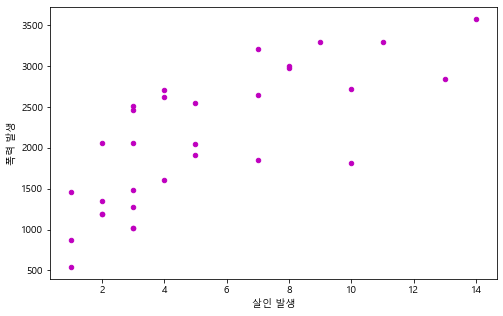

In [4]:
# 산점도를 통한 선형성을 통해 상관관계를 파악.
df.plot(kind='scatter', x='살인 발생', y='폭력 발생', c='m', figsize=(8,5))
plt.show()

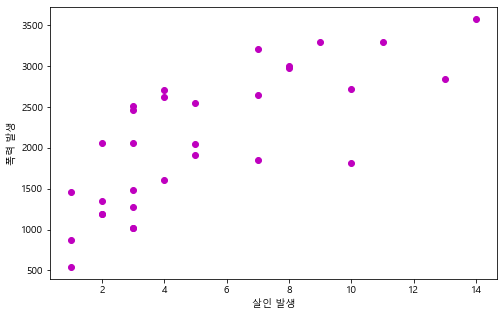

In [5]:
# 다른 방법으로 산점도를 그려봄.
plt.figure(figsize=(8,5))
plt.scatter(df['살인 발생'], df['폭력 발생'], color='m')
plt.xlabel('살인 발생')
plt.ylabel('폭력 발생')
plt.show()

#### 히트맵(Hitmap)
- camp : 색상 지정.
- vmin : 색상의 최소값 지정.
- vmax : 색상의 최대값 지정.
- cbar : color bar를 표시.
- center : 중앙값을 표시.
- annot=True : 상관관계 수치 표시.
- linewidths : cell 사이의 선을 넣음.
- 참고사이트 : https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html


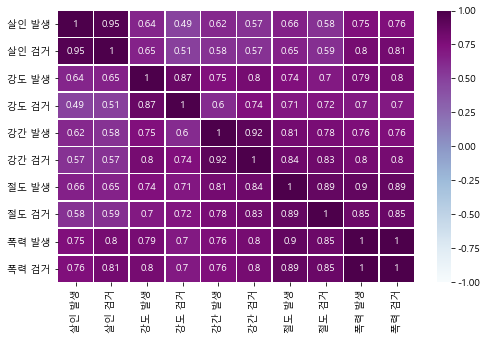

In [6]:
# 상관관계를 히트맵으로 한눈에 보기.
plt.figure(figsize=(8,5))
sb.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, linewidths=0.5, cmap='BuPu')
plt.show()